# LeNet

In [1]:
from tensorflow import keras
import numpy as np

from d2l.tensorflow import config

config.setup('GPU')

Tensorflow running on GPU


In [3]:
lenet = keras.models.Sequential()

lenet.add(keras.layers.Conv2D(filters=6, kernel_size=5, input_shape=(28, 28, 1), padding='same', activation='sigmoid'))
lenet.add(keras.layers.AveragePooling2D(pool_size=2, strides=2))

lenet.add(keras.layers.Conv2D(filters=16, kernel_size=5, padding='same', activation='sigmoid'))
lenet.add(keras.layers.AveragePooling2D(pool_size=2, strides=2))

lenet.add(keras.layers.Flatten())

lenet.add(keras.layers.Dense(units=120, activation='sigmoid'))
lenet.add(keras.layers.Dense(units=84, activation='sigmoid'))
lenet.add(keras.layers.Dense(units=10, activation='softmax'))

In [4]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [5]:
X = np.random.uniform(size=(1, 28, 28, 1)).astype(np.float32)

for layer in lenet.layers:
    X = layer(X)
    print('{} output shape: {}'.format(layer.name, X.shape))

conv2d output shape: (1, 28, 28, 6)
average_pooling2d output shape: (1, 14, 14, 6)
conv2d_1 output shape: (1, 14, 14, 16)
average_pooling2d_1 output shape: (1, 7, 7, 16)
flatten output shape: (1, 784)
dense output shape: (1, 120)
dense_1 output shape: (1, 84)
dense_2 output shape: (1, 10)


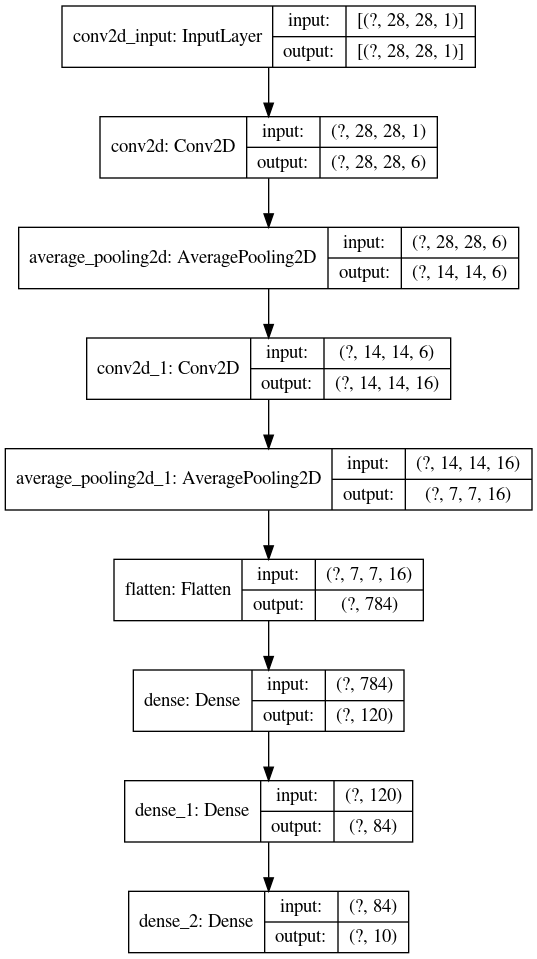

In [6]:
keras.utils.plot_model(lenet, show_shapes=True, to_file='lenet.png')

## Training

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
batch_size = 256
epochs = 20
learning_rate = 0.3

optmizer = keras.optimizers.SGD(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()

lenet.compile(optimizer=optmizer, loss=loss, metrics=metric)

In [8]:
hist = lenet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
235/235 [==============================] - 9s 40ms/step - loss: 2.2080 - categorical_accuracy: 0.1747 - val_loss: 1.5942 - val_categorical_accuracy: 0.4207
Epoch 2/20
235/235 [==============================] - 10s 42ms/step - loss: 1.1198 - categorical_accuracy: 0.5701 - val_loss: 0.9580 - val_categorical_accuracy: 0.5962
Epoch 3/20
235/235 [==============================] - 12s 53ms/step - loss: 0.8037 - categorical_accuracy: 0.6869 - val_loss: 0.7076 - val_categorical_accuracy: 0.7333
Epoch 4/20
235/235 [==============================] - 15s 64ms/step - loss: 0.6745 - categorical_accuracy: 0.7377 - val_loss: 0.6581 - val_categorical_accuracy: 0.7376
Epoch 5/20
235/235 [==============================] - 14s 58ms/step - loss: 0.6174 - categorical_accuracy: 0.7599 - val_loss: 0.8007 - val_categorical_accuracy: 0.6869
Epoch 6/20
235/235 [==============================] - 10s 43ms/step - loss: 0.5681 - categorical_accuracy: 0.7799 - val_loss: 0.5771 - val_categorical_accuracy: 

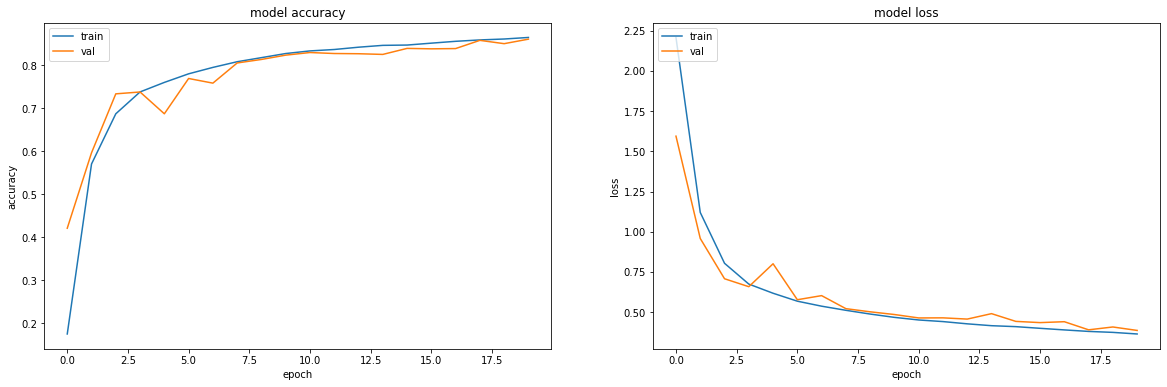

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)

axes[0].plot(hist.history['categorical_accuracy'])
axes[0].plot(hist.history['val_categorical_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'val'], loc='upper left')


axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'val'], loc='upper left')

plt.show()